In [128]:
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

In [129]:
data = pd.read_csv('mixed.csv')

In [130]:
data.head()

,Category,No_of_libraries,Libstdcplus,glibc,glibcxx,Rs,Rust,dot_go,Go
0,C,6,False,3,0,0,0,False,1
1,C,6,False,3,0,0,0,False,1
2,C,6,False,3,0,0,0,False,1
3,C,6,False,3,0,0,0,False,1
4,C,6,False,3,0,0,0,False,1


In [131]:
data.describe()


,No_of_libraries,glibc,glibcxx,Rs,Rust,Go
count,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000
mean,60.307500,47.82500,0.272500,0.375000,25.830000,43.722500
std,126.134085,109.59698,0.445803,0.484729,61.509101,210.293447
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,4.00000,0.000000,0.000000,0.000000,1.000000
50%,13.000000,10.00000,0.000000,0.000000,0.000000,1.000000
75%,23.000000,15.00000,1.000000,1.000000,9.000000,14.500000
max,1134.000000,528.00000,1.000000,1.000000,253.000000,2238.000000


In [132]:
data.shape


(400, 9)

In [133]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data.head()

,Category,No_of_libraries,Libstdcplus,glibc,glibcxx,Rs,Rust,dot_go,Go
0,C,6,False,3,0,0,0,False,1
1,C,6,False,3,0,0,0,False,1
2,C,6,False,3,0,0,0,False,1
3,C,6,False,3,0,0,0,False,1
4,C,6,False,3,0,0,0,False,1


In [134]:
data['Libstdcplus'] = le.fit_transform(data['Libstdcplus'])
data.head()

,Category,No_of_libraries,Libstdcplus,glibc,glibcxx,Rs,Rust,dot_go,Go
0,C,6,0,3,0,0,0,False,1
1,C,6,0,3,0,0,0,False,1
2,C,6,0,3,0,0,0,False,1
3,C,6,0,3,0,0,0,False,1
4,C,6,0,3,0,0,0,False,1


In [135]:
data['dot_go'] = le.fit_transform(data['dot_go'])
data.head()


,Category,No_of_libraries,Libstdcplus,glibc,glibcxx,Rs,Rust,dot_go,Go
0,C,6,0,3,0,0,0,0,1
1,C,6,0,3,0,0,0,0,1
2,C,6,0,3,0,0,0,0,1
3,C,6,0,3,0,0,0,0,1
4,C,6,0,3,0,0,0,0,1


In [136]:
X = data.drop(['Category'], axis=1)
X

,No_of_libraries,Libstdcplus,glibc,glibcxx,Rs,Rust,dot_go,Go
0,6,0,3,0,0,0,0,1
1,6,0,3,0,0,0,0,1
2,6,0,3,0,0,0,0,1
3,6,0,3,0,0,0,0,1
4,6,0,3,0,0,0,0,1
...,...,...,...,...,...,...,...,...
395,14,0,6,1,1,1,1,155
396,11,0,6,1,1,5,1,245
397,10,0,7,0,1,1,1,1421
398,2,0,2,0,0,0,1,49


In [137]:
y = data['Category']
y

0       C
1       C
2       C
3       C
4       C
       ..
395    Go
396    Go
397    Go
398    Go
399    Go
Name: Category, Length: 400, dtype: object

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 40)

In [140]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(320, 8)
(80, 8)
(320,)
(80,)


In [141]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)


MultinomialNB()

In [142]:
predicted = clf.predict(X_test)
predicted

array(['Cpp', 'Go', 'Go', 'C', 'Rust', 'Rust', 'Rust', 'C', 'Go', 'Rust',
       'Go', 'C', 'Rust', 'Rust', 'Cpp', 'C', 'Cpp', 'Cpp', 'C', 'Go',
       'Go', 'C', 'Rust', 'Cpp', 'C', 'C', 'C', 'C', 'C', 'Rust', 'C',
       'Rust', 'Cpp', 'Cpp', 'Go', 'C', 'Go', 'C', 'Cpp', 'Rust', 'Cpp',
       'C', 'Cpp', 'C', 'Cpp', 'Rust', 'Cpp', 'C', 'Cpp', 'Rust', 'Cpp',
       'Go', 'Go', 'Cpp', 'Rust', 'Go', 'Go', 'Cpp', 'Rust', 'C', 'C',
       'Rust', 'Go', 'Cpp', 'C', 'Cpp', 'Cpp', 'Cpp', 'Go', 'C', 'C',
       'Go', 'Go', 'C', 'Cpp', 'Go', 'Cpp', 'C', 'C', 'C'], dtype='<U4')

In [143]:
prediction = clf.score(X_test, y_test) *100
prediction

92.5

<AxesSubplot:>

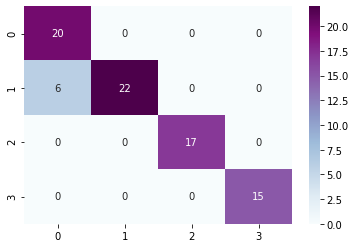

In [144]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predicted)
sns.heatmap(cm,cmap='BuPu',annot=True,fmt='d')

In [145]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier(random_state = 42).fit(X_train, y_train)
y_pred = rfc.predict(X_test)
score = accuracy_score(y_test, y_pred) *100
score

97.5

<AxesSubplot:>

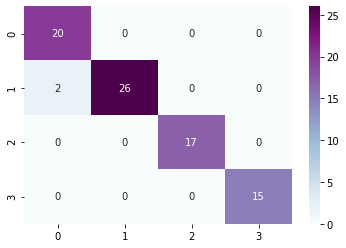

In [146]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,cmap='BuPu',annot=True,fmt='d')

In [147]:
from sklearn import tree
clf1 = tree.DecisionTreeClassifier(random_state = 42)
clf1 = clf1.fit(X_train,y_train)

In [148]:
predicted1 = clf1.predict(X_test)
predicted

array(['Cpp', 'Go', 'Go', 'C', 'Rust', 'Rust', 'Rust', 'C', 'Go', 'Rust',
       'Go', 'C', 'Rust', 'Rust', 'Cpp', 'C', 'Cpp', 'Cpp', 'C', 'Go',
       'Go', 'C', 'Rust', 'Cpp', 'C', 'C', 'C', 'C', 'C', 'Rust', 'C',
       'Rust', 'Cpp', 'Cpp', 'Go', 'C', 'Go', 'C', 'Cpp', 'Rust', 'Cpp',
       'C', 'Cpp', 'C', 'Cpp', 'Rust', 'Cpp', 'C', 'Cpp', 'Rust', 'Cpp',
       'Go', 'Go', 'Cpp', 'Rust', 'Go', 'Go', 'Cpp', 'Rust', 'C', 'C',
       'Rust', 'Go', 'Cpp', 'C', 'Cpp', 'Cpp', 'Cpp', 'Go', 'C', 'C',
       'Go', 'Go', 'C', 'Cpp', 'Go', 'Cpp', 'C', 'C', 'C'], dtype='<U4')

In [149]:
prediction1 = clf1.score(X_test, y_test) *100

In [150]:
prediction1

96.25

In [151]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [152]:
dot_data = StringIO()

In [153]:
export_graphviz(clf1,out_file = dot_data,filled=True, rounded=True,special_characters = True)

In [154]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

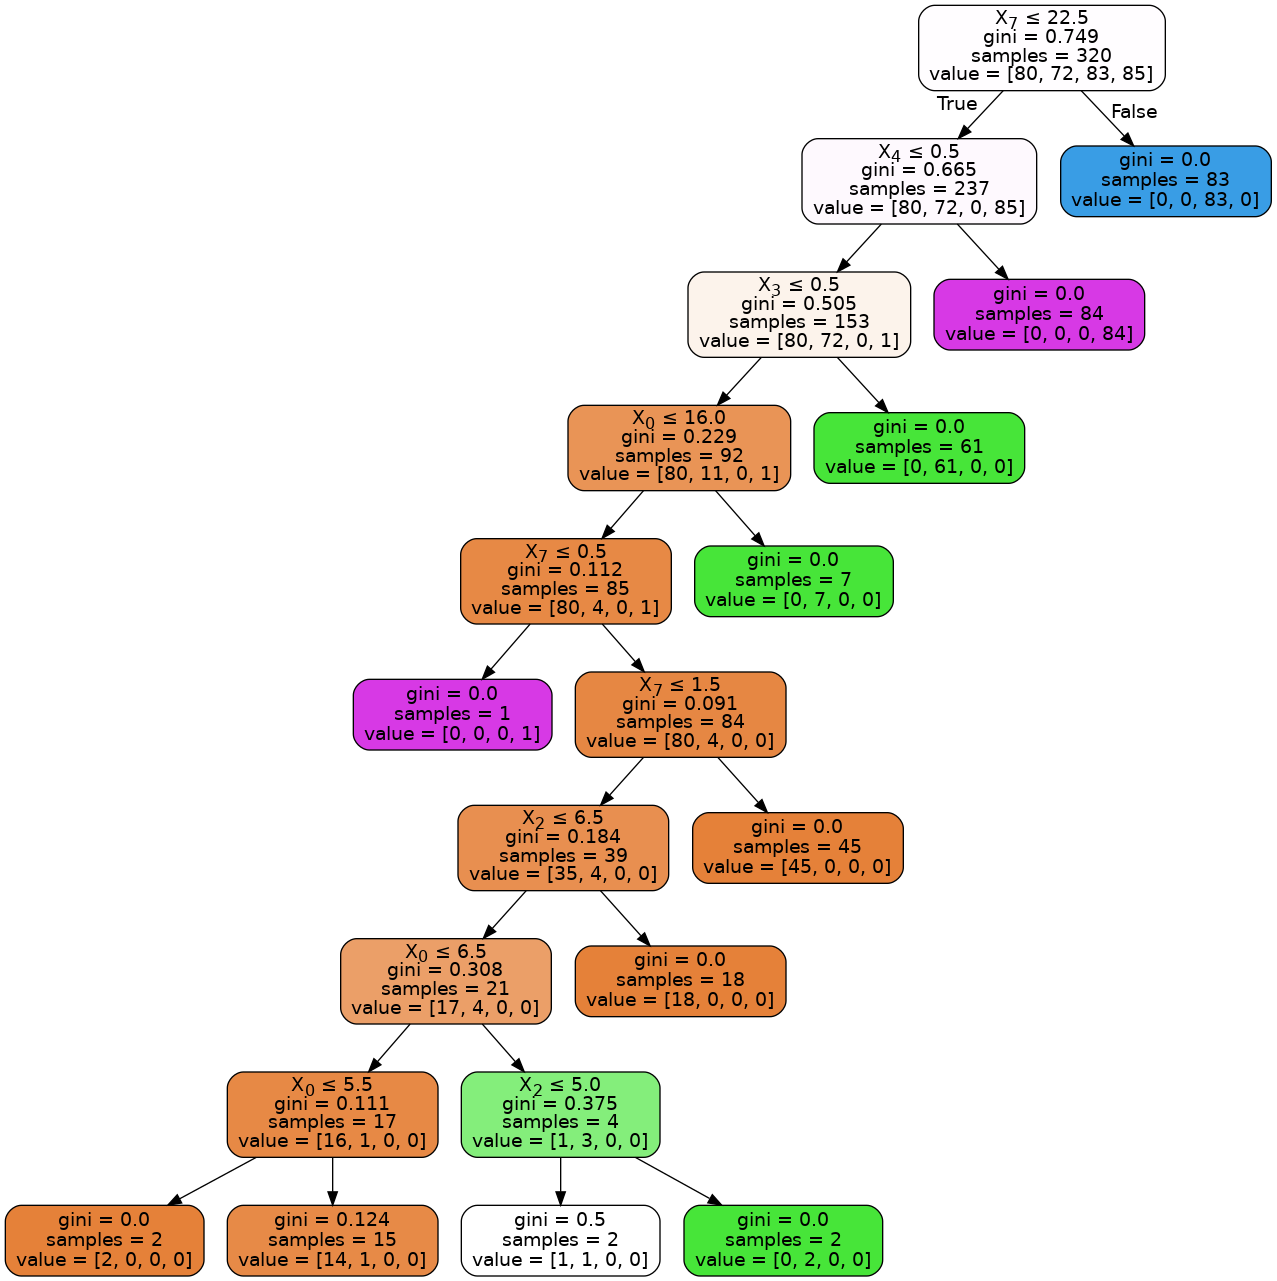

In [155]:
Image(graph.create_png())